<a href="https://colab.research.google.com/github/annnanya/zomato/blob/main/ZomatoDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ZOMATO DATA ANALYSIS**

This analysis is for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
!unzip "/content/drive/MyDrive/zomato worldwide.zip"

Archive:  /content/drive/MyDrive/zomato worldwide.zip
  inflating: Country-Code.xlsx       
  inflating: file1.json              
  inflating: file2.json              
  inflating: file3.json              
  inflating: file4.json              
  inflating: file5.json              
  inflating: zomato.csv              


In [ ]:
zomato_data = pd.read_csv(r"/content/zomato.csv", encoding='latin-1')
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
zomato_india = zomato_data[zomato_data['Country Code']==1] # Extracting the data of INDIA and country code for India is 1

In [ ]:
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [ ]:
 # Dropping the unecessary columns
zomato_ncr.drop(['Country Code', 'Currency'], axis = 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
zomato_india.shape

(8652, 21)

In [ ]:
zomato_india['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Amritsar          21
Guwahati          21
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Vizag             20
Kochi             20
Kanpur            20
Surat             20
Mumbai            20
Bhopal            20
Dehradun          20
Bangalore         20
Patna             20
Indore            20
Nashik            20
Allahabad         20
Ranchi            20
Mysore            20
Coimbatore        20
Goa               20
Mangalore         20
Nagpur            20
Ludhiana          20
Jaipur            20
Aurangabad        20
Varanasi          20
Puducherry        20
Pune              20
Agra              20
Chennai           20
Kolkata           20
Vadodara          20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [ ]:
# Extracting the Delhi NCR data
zomato_ncr = zomato_india[(zomato_india['City'] == 'New Delhi') | (zomato_india['City'] == 'Gurgaon') | (zomato_india['City'] == 'Faridabad') | (zomato_india['City'] == 'Noida') | (zomato_india['City'] == 'Ghaziabad')]

In [ ]:
zomato_ncr.shape

(7947, 21)

In [ ]:
zomato_ncr.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7


In [ ]:
# Check the type of feautres
zomato_ncr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7947 entries, 865 to 9112
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7947 non-null   int64  
 1   Restaurant Name       7947 non-null   object 
 2   Country Code          7947 non-null   int64  
 3   City                  7947 non-null   object 
 4   Address               7947 non-null   object 
 5   Locality              7947 non-null   object 
 6   Locality Verbose      7947 non-null   object 
 7   Longitude             7947 non-null   float64
 8   Latitude              7947 non-null   float64
 9   Cuisines              7947 non-null   object 
 10  Average Cost for two  7947 non-null   int64  
 11  Currency              7947 non-null   object 
 12  Has Table booking     7947 non-null   object 
 13  Has Online delivery   7947 non-null   object 
 14  Is delivering now     7947 non-null   object 
 15  Switch to order men

In [ ]:
# Check for Null Values
zomato_ncr.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
# Encode the boolean values
boolean_columns = ['Has Table booking',	'Has Online delivery',	'Is delivering now',	'Switch to order menu']

# Create encoding
encoding = {"Yes" : 1,
            "No" : 0}

# encoding using the lambda function
for col in boolean_columns:
  zomato_ncr[col] = zomato_ncr[col].apply(lambda x : encoding[x]) # encoding['Yes']--> 1, encoding['No']--> 0

# print the boolean data
zomato_ncr[boolean_columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
865,0,0,0,0
866,0,0,0,0
867,0,0,0,0
868,0,0,0,0
869,0,0,0,0
...,...,...,...,...
9108,0,1,0,0
9109,0,0,0,0
9110,0,0,0,0
9111,0,0,0,0


In [ ]:
# Check the number of unique restaurants
pd.set_option('display.max_rows', None)
zomato_ncr['Restaurant Name'].value_counts() 

Cafe Coffee Day                                       83
Domino's Pizza                                        77
Subway                                                62
Green Chick Chop                                      51
McDonald's                                            46
Keventers                                             34
Giani                                                 29
Baskin Robbins                                        28
Dunkin' Donuts                                        22
Giani's                                               22
Barista                                               22
Costa Coffee                                          20
Pizza Hut                                             20
Pizza Hut Delivery                                    19
Twenty Four Seven                                     19
Wah Ji Wah                                            19
Republic of Chicken                                   18
Chaayos                        

In [ ]:
# Check restaurants having more than 5 outlets
more_than_5_outlets = {}
for restaurant, val in zip(zomato_ncr['Restaurant Name'].value_counts().index, zomato_ncr['Restaurant Name'].value_counts()):

  # If the value is greater than equal to 5 then append the restaurant in the dictionary along with it's value
  if val >= 5:
    more_than_5_outlets[restaurant] = val


# Print the count
print("Restaurants in Delhi-NCR having more than 5 outlets {}".format(len(more_than_5_outlets.keys())))

Restaurants in Delhi-NCR having more than 5 outlets 102


Only 102 restaurants in Delhi NCR have more than 5 outlets.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


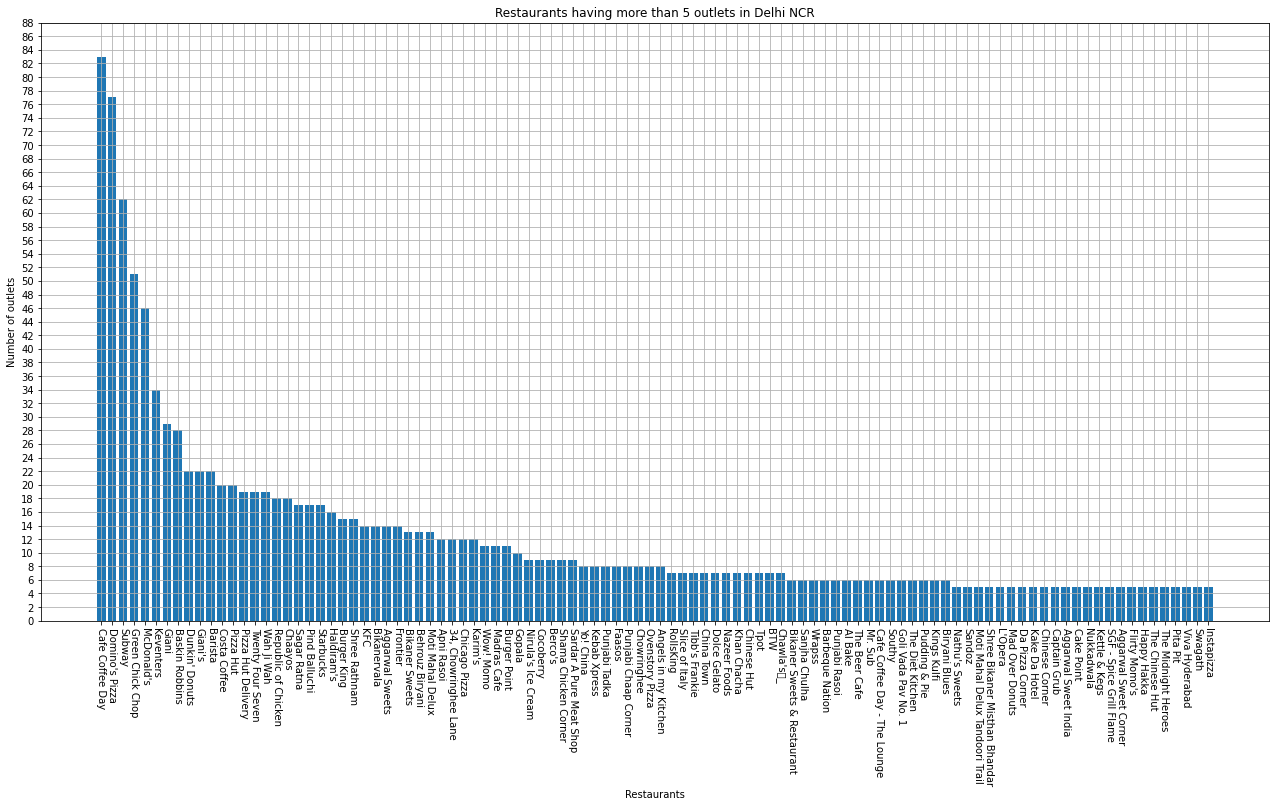

In [ ]:
# Plot the restaurants having more than 5 outlets in Delhi NCR
plt.figure(figsize = (22,11))
plt.bar(x = more_than_5_outlets.keys(), height=more_than_5_outlets.values())
plt.xlabel('Restaurants')
plt.ylabel('Number of outlets')
plt.title('Restaurants having more than 5 outlets in Delhi NCR')
plt.xticks(rotation = -90)
plt.yticks(np.arange(0,90,2))
plt.grid()
plt.show()

# **Restaurants having more than 5 outlets**

In [ ]:
def five_or_more_outlets(data, column):
  
  for col in column:

    d = zomato_ncr[zomato_ncr['Restaurant Name'] == col]
    data = pd.concat((data,d), axis = 0) # join row wise or horizontal joining
  
  return data

In [ ]:
Five_or_more_outlets = pd.DataFrame(None) # Create a dataframe

# Call the above method
Five_or_more_outlets = five_or_more_outlets(Five_or_more_outlets, list(more_than_5_outlets.keys()))

In [ ]:
list(more_than_5_outlets.keys())

['Cafe Coffee Day',
 "Domino's Pizza",
 'Subway',
 'Green Chick Chop',
 "McDonald's",
 'Keventers',
 'Giani',
 'Baskin Robbins',
 "Dunkin' Donuts",
 "Giani's",
 'Barista',
 'Costa Coffee',
 'Pizza Hut',
 'Pizza Hut Delivery',
 'Twenty Four Seven',
 'Wah Ji Wah',
 'Republic of Chicken',
 'Chaayos',
 'Sagar Ratna',
 'Pind Balluchi',
 'Starbucks',
 "Haldiram's",
 'Burger King',
 'Shree Rathnam',
 'KFC',
 'Bikanervala',
 'Aggarwal Sweets',
 'Frontier',
 'Bikaner Sweets',
 'Behrouz Biryani',
 'Moti Mahal Delux',
 'Apni Rasoi',
 '34, Chowringhee Lane',
 'Chicago Pizza',
 "Karim's",
 'Wow! Momo',
 'Madras Cafe',
 'Burger Point',
 'Gopala',
 "Nirula's Ice Cream",
 'Cocoberry',
 "Berco's",
 'Shama Chicken Corner',
 'Sardar A Pure Meat Shop',
 'Yo! China',
 'Kebab Xpress',
 'Punjabi Tadka',
 'Faasos',
 'Punjabi Chaap Corner',
 'Chowringhee',
 'Ovenstory Pizza',
 'Angels in my Kitchen',
 'RollsKing',
 'Slice of Italy',
 "Tibb's Frankie",
 'China Town',
 'Dolce Gelato',
 'Nazeer Foods',
 'Khan Cha

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


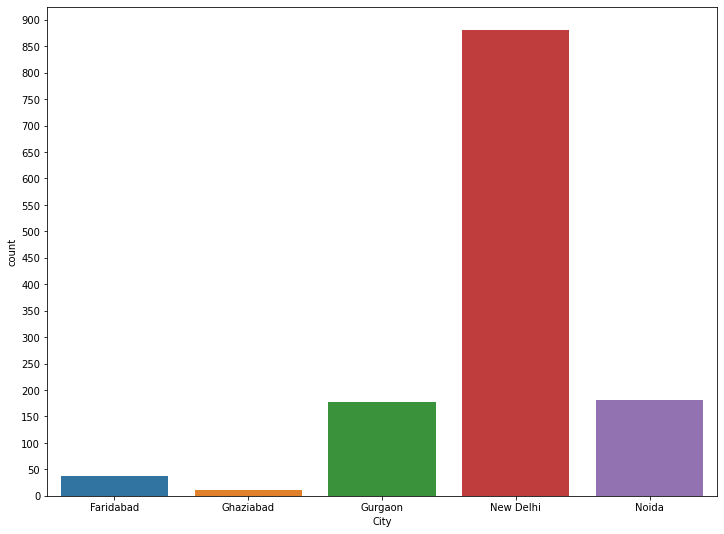

In [ ]:
# Visualising the distribution of restaurants based on the city 
import seaborn as sns

plt.figure(figsize=(12,9))
sns.countplot(Five_or_more_outlets['City']) # bargraph in matplotlib
plt.yticks(np.arange(0,950,50))
plt.show()

**New Delhi**

In [ ]:
delhi_data = Five_or_more_outlets.groupby('City').get_group('New Delhi') # Extract New Delhi data

In [ ]:
delhi_data[['Locality', 'Locality Verbose']]

,Locality,Locality Verbose
0,Alaknanda,"Alaknanda, New Delhi"
1,Barakhamba Road,"Barakhamba Road, New Delhi"
2,"Basant Lok Market, Vasant Vihar","Basant Lok Market, Vasant Vihar, New Delhi"
3,Chanakyapuri,"Chanakyapuri, New Delhi"
4,Chittaranjan Park,"Chittaranjan Park, New Delhi"
...,...,...
876,Defence Colony,"Defence Colony, New Delhi"
877,Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi"
878,Malviya Nagar,"Malviya Nagar, New Delhi"
879,Jangpura,"Jangpura, New Delhi"


In [ ]:
# Drop the Locality Verbose
delhi_data.drop('Locality Verbose', axis = 1, inplace = True)

In [ ]:
# Visualise the distributuion of locality
pd.set_option('display.max_rows', None)
delhi_data['Locality'].value_counts().sort_values(ascending = False)

Connaught Place                         25
Rajinder Nagar                          19
Karol Bagh                              17
Rohini                                  17
Greater Kailash (GK) 2                  16
Netaji Subhash Place                    16
Malviya Nagar                           16
Punjabi Bagh                            15
Laxmi Nagar                             15
Kamla Nagar                             15
Moments Mall, Kirti Nagar               15
Defence Colony                          14
V3S Mall, Laxmi Nagar                   14
Jail Road                               13
Green Park                              13
Shahdara                                13
Janakpuri                               13
East Patel Nagar                        13
Jangpura                                12
Shalimar Bagh                           12
Pacific Mall, Tagore Garden             12
Preet Vihar                             12
Nehru Place                             12
Rajouri Gar

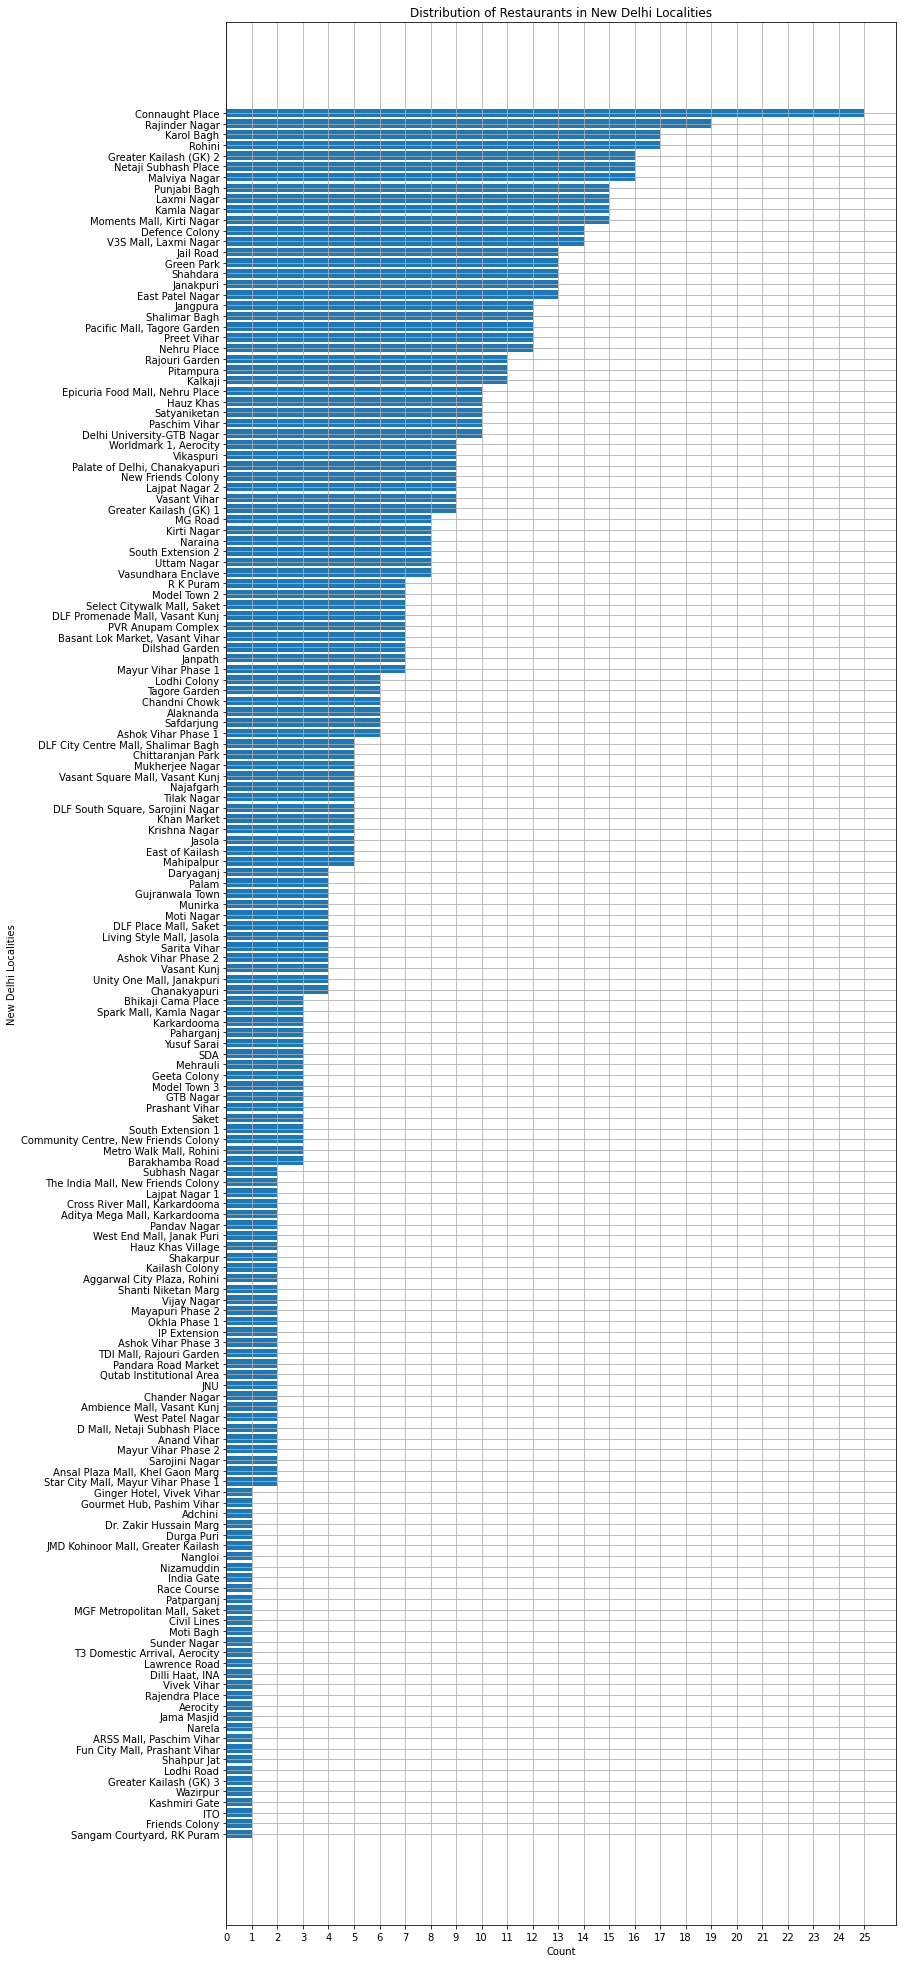

In [ ]:
plt.figure(figsize=(12,35))
plt.barh(delhi_data['Locality'].value_counts().sort_values().index, delhi_data['Locality'].value_counts().sort_values()) # horizontal bar plots
plt.ylabel('New Delhi Localities')
plt.xlabel('Count')
plt.title('Distribution of Restaurants in New Delhi Localities')
plt.xticks(np.arange(0,26,1))
plt.grid()
plt.show()

**Inference :**
  * South Delhi Areas have more number of outlets as compared to other parts of Delhi. 



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


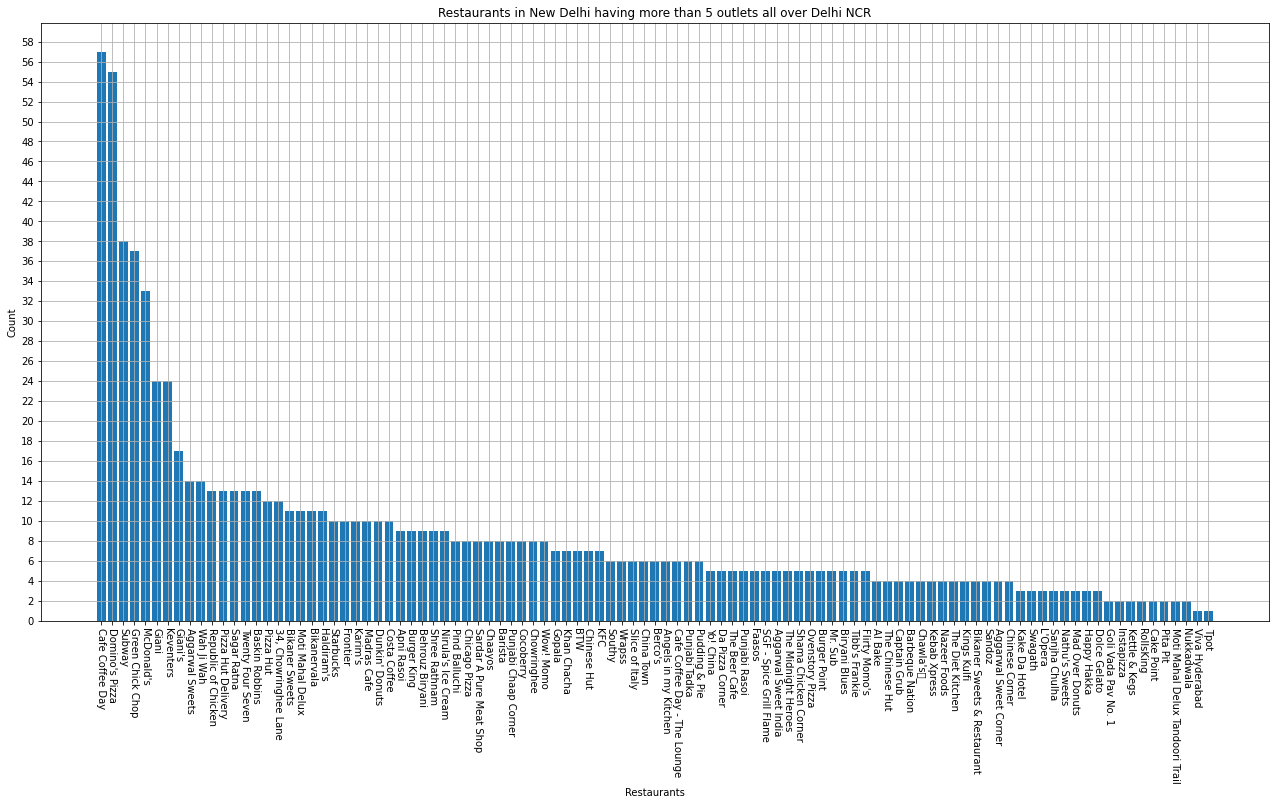

In [ ]:
plt.figure(figsize = (22, 11))
plt.bar(delhi_data['Restaurant Name'].value_counts().index, delhi_data['Restaurant Name'].value_counts())
plt.xlabel('Restaurants')
plt.ylabel('Count')
plt.title('Restaurants in New Delhi having more than 5 outlets all over Delhi NCR')
plt.xticks(rotation = -90)
plt.yticks(np.arange(0,60,2))
plt.grid()
plt.show()

In [ ]:
for restaurant, cuisine in zip(delhi_data['Restaurant Name'], delhi_data['Cuisines']):

  print(restaurant + " : " + cuisine)

Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee

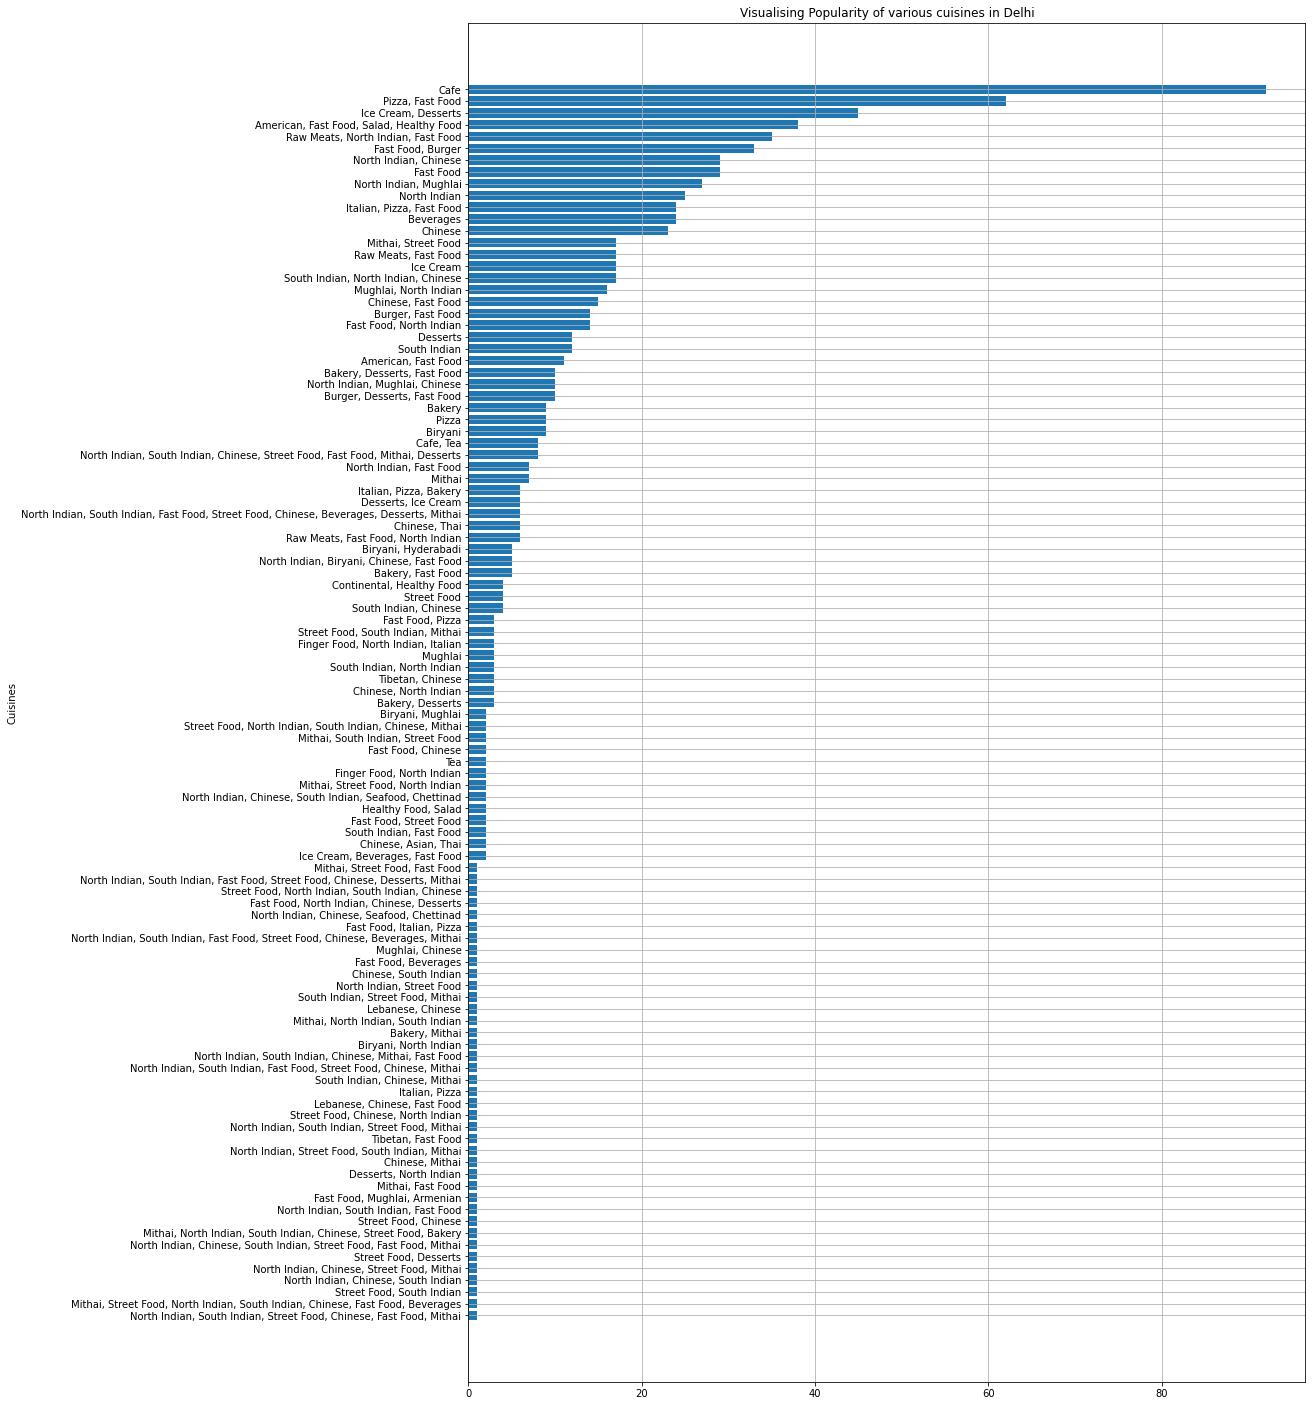

In [ ]:
# Plot the cuisine popularity in delhi
plt.figure(figsize=(15,25))
plt.barh(delhi_data['Cuisines'].value_counts().sort_values().index, delhi_data['Cuisines'].value_counts().sort_values())
plt.ylabel("Cuisines")
plt.title('Visualising Popularity of various cuisines in Delhi')
plt.grid()
plt.show()

**Inference:**

 * Fast Food is the most trending cuisine.

In [ ]:
# Create competitor data

'''Competitors are those who are selling Mughlai, Fast Food, American, Pizza and Burger'''
competitor_restaurants = set()
for restaurant, cuisine in zip(delhi_data['Restaurant Name'], delhi_data['Cuisines']):

  if 'Mughlai' in cuisine or 'Fast Food' in cuisine or 'American' in cuisine or 'Pizza' in cuisine or 'Burger' in cuisine or 'Biryani' in cuisine:
    competitor_restaurants.add(restaurant)

In [ ]:
len(competitor_restaurants)

61

**Inference:**

* 61 restaurants are competitors


In [ ]:
# Extracting the competitor data

competitor_data = pd.DataFrame(None)
for col in competitor_restaurants:

  d = delhi_data[delhi_data['Restaurant Name'] == col]
  competitor_data = pd.concat((competitor_data, d), axis=0)

In [ ]:
competitor_data.shape

(544, 21)

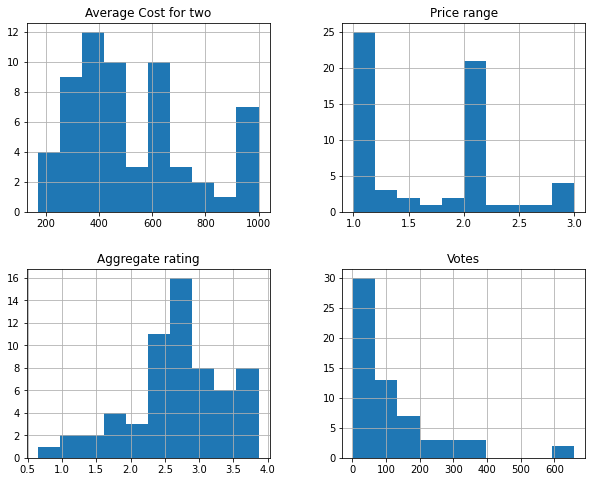

In [ ]:
# Grouping the competitor data by restaurant name and then visualise the mean of average cost
mean_competitor_data = competitor_data.groupby('Restaurant Name').mean()[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]
mean_competitor_data.hist(figsize=(10,8))
plt.show()

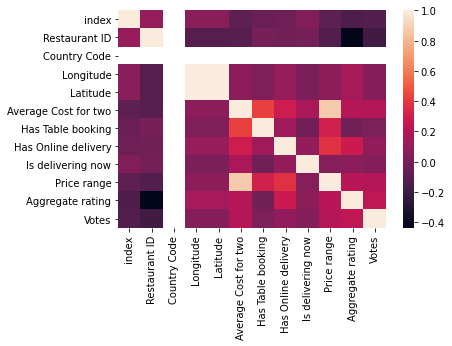

In [ ]:
#correlation in the competitor data
sns.heatmap(competitor_data.drop('Switch to order menu', axis = 1).corr())
plt.show()

 **Inference:**

   * The average cost for two of the competitors is majorly between INR 200-800
   * The price range is between 1 and 3, most of them having 1.
   * There is a positive correlation between Average Cost for two and Has Online Delivery and Has Table booking.



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


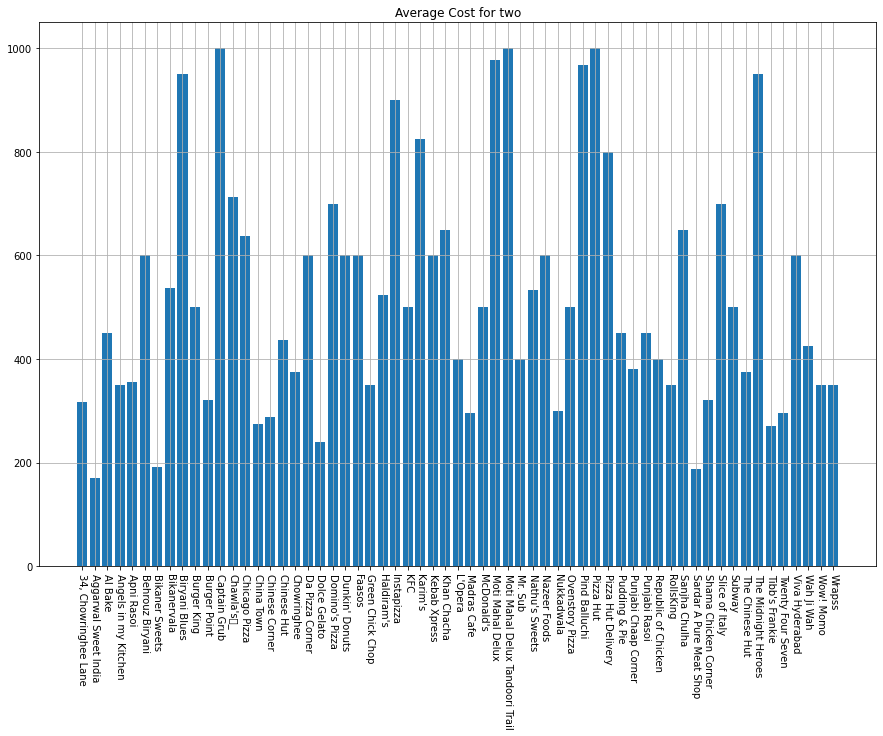

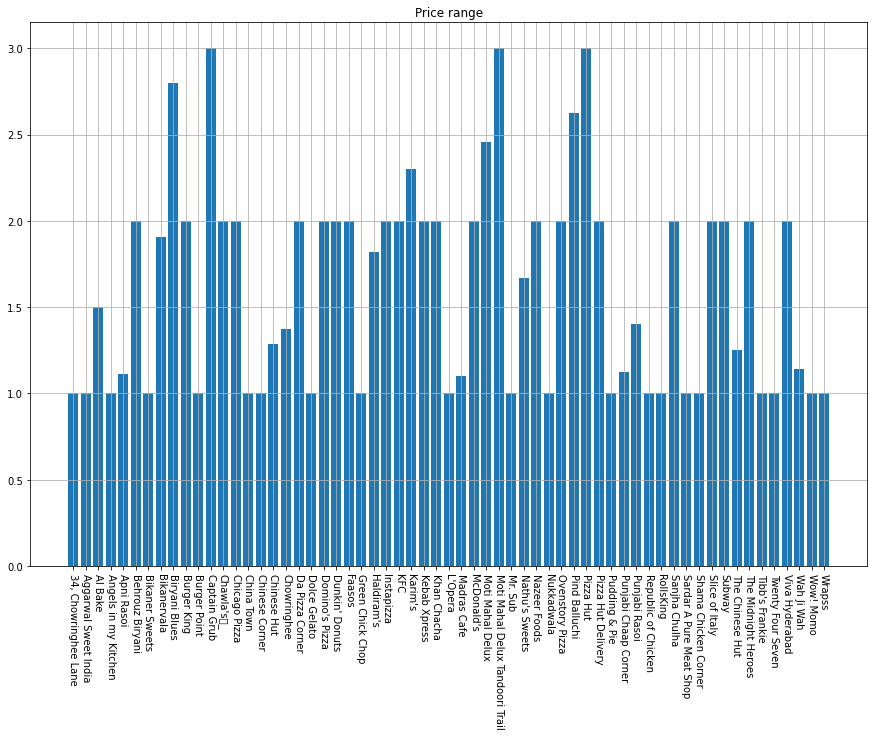

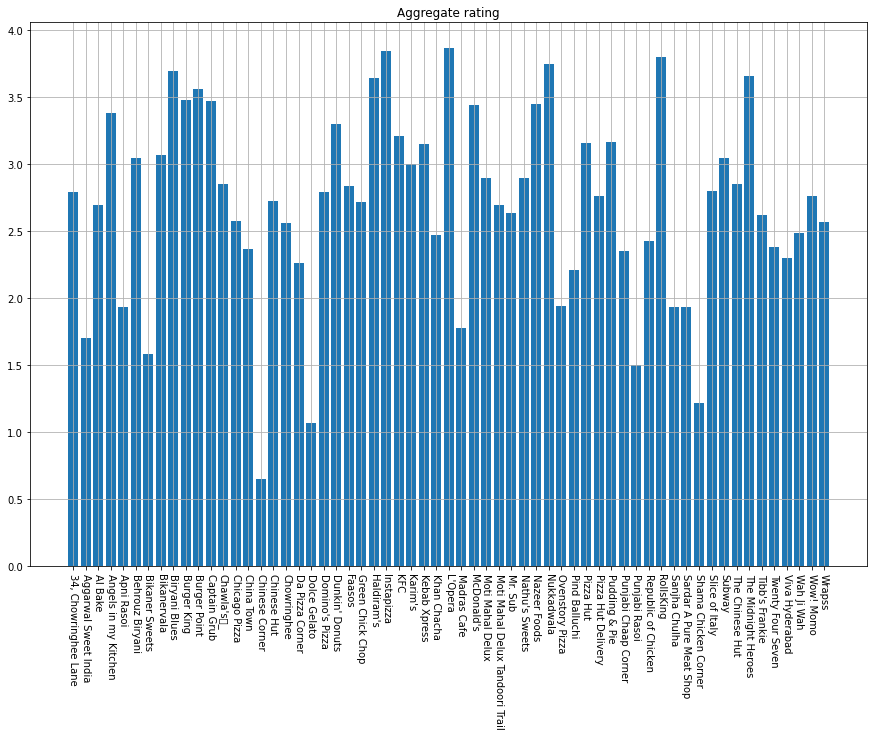

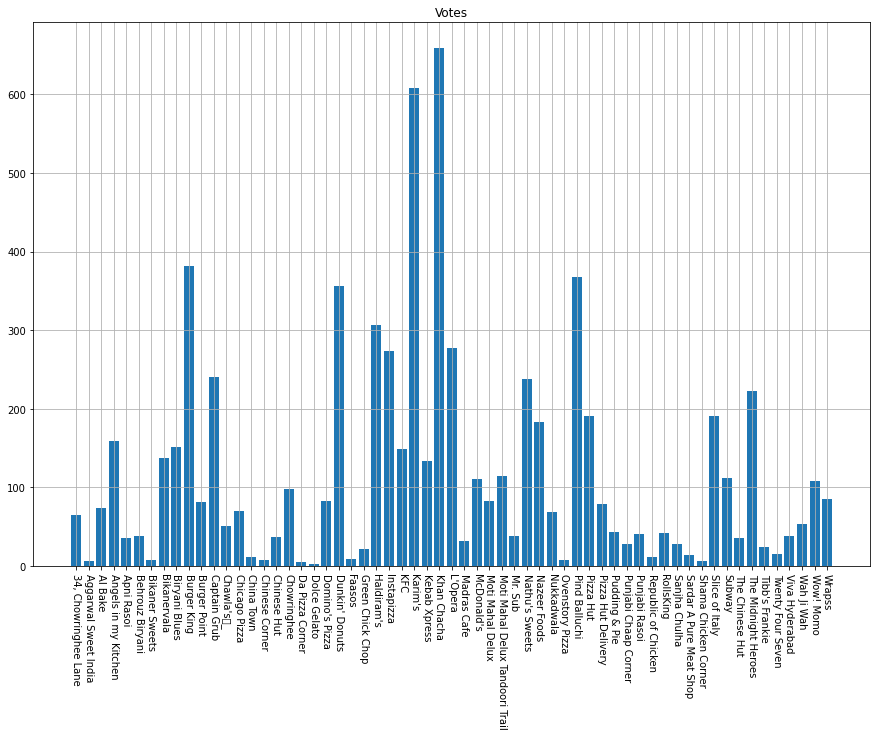

In [ ]:
for col in mean_competitor_data.columns:
  plt.figure(figsize = (15, 10))
  plt.bar(mean_competitor_data.index, mean_competitor_data[col])
  plt.title(col)
  plt.grid()
  plt.xticks(rotation = -90)
  plt.show()

In [ ]:
top_competitors = ['KFC', "Biryani Blues", "Burger King", "Captain Grub", "Domino's Pizza", "Dunkin' Donuts", "Karim's", "Kebab Xpress", "Khan Chacha", "McDonalds", "Nazeer Foods", "Faasos", " Ovenstoy Pizza", "Pizza Hut", "Wow! Momo"]

In [ ]:
# Plotting the coordinates on the map
!pip install gmplot # googla maps plot
import gmplot

     |████████████████████████████████| 164 kB 7.8 MB/s 


In [ ]:
competitor_restaurants

{'34, Chowringhee Lane',
 'Aggarwal Sweet India',
 'Al Bake',
 'Angels in my Kitchen',
 'Apni Rasoi',
 'Behrouz Biryani',
 'Bikaner Sweets',
 'Bikanervala',
 'Biryani Blues',
 'Burger King',
 'Burger Point',
 'Captain Grub',
 "Chawla's\x8c_",
 'Chicago Pizza',
 'China Town',
 'Chinese Corner',
 'Chinese Hut',
 'Chowringhee',
 'Da Pizza Corner',
 'Dolce Gelato',
 "Domino's Pizza",
 "Dunkin' Donuts",
 'Faasos',
 'Green Chick Chop',
 "Haldiram's",
 'Instapizza',
 'KFC',
 "Karim's",
 'Kebab Xpress',
 'Khan Chacha',
 "L'Opera",
 'Madras Cafe',
 "McDonald's",
 'Moti Mahal Delux',
 'Moti Mahal Delux Tandoori Trail',
 'Mr. Sub',
 "Nathu's Sweets",
 'Nazeer Foods',
 'Nukkadwala',
 'Ovenstory Pizza',
 'Pind Balluchi',
 'Pizza Hut',
 'Pizza Hut Delivery',
 'Pudding & Pie',
 'Punjabi Chaap Corner',
 'Punjabi Rasoi',
 'Republic of Chicken',
 'RollsKing',
 'Sanjha Chulha',
 'Sardar A Pure Meat Shop',
 'Shama Chicken Corner',
 'Slice of Italy',
 'Subway',
 'The Chinese Hut',
 'The Midnight Heroes',
 

In [ ]:
# Create a google map object
def create_googlemap(data, columns):
  
  # Map object
  gmap = gmplot.GoogleMapPlotter(28.7041, 77.1025, 20)
  for col in columns:

    # create latitude and longitude
    latitude = data[data['Restaurant Name'] == col]['Latitude'].values # Extracts latitude
    longitude = data[data['Restaurant Name'] == col]['Longitude'].values # extracts longitude
    gmap.scatter(latitude, longitude, color = 'red', size = 300, marker = False) # Plots the scatter plot
    gmap.draw("/content/map.html") # Save


# Call the above method
create_googlemap(competitor_data, competitor_restaurants)

In [ ]:
os.mkdir("/content/maps") # Creates a dorectory

In [ ]:
# Create individual maps
def create_individual_googlemap(data, columns):
  
  for col in columns:

    # Map object
    gmap = gmplot.GoogleMapPlotter(28.7041, 77.1025, 20)
    # create latitude and longitude
    latitude = data[data['Restaurant Name'] == col]['Latitude'].values
    longitude = data[data['Restaurant Name'] == col]['Longitude'].values
    gmap.scatter(latitude, longitude, color = 'red', size = 300, marker = True)
    gmap.draw("/content/maps/" + col  + ".html")

# Call the above method
create_individual_googlemap(competitor_data, competitor_restaurants)

In [ ]:
# Download the maps
!zip -r /content/maps.zip /content/maps # Creating a zip folder# Printing the WordCLoud

# Import libraries
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = (WordCloud(width = 1440, height = 1080, relative_scaling = 1, stopwords = stopwords).generate_from_frequencies(competitor_data['Restaurant Name'].value_counts()))

# Creating the figure
fig = plt.figure(1, figsize=(25,12))
plt.imshow(wordcloud) # plot an image
plt.axis("off")
plt.show()

  adding: content/maps/ (stored 0%)
  adding: content/maps/Burger Point.html (deflated 51%)
  adding: content/maps/Wrapss.html (deflated 54%)
  adding: content/maps/Twenty Four Seven.html (deflated 66%)
  adding: content/maps/Madras Cafe.html (deflated 61%)
  adding: content/maps/Bikanervala.html (deflated 63%)
  adding: content/maps/Ovenstory Pizza.html (deflated 51%)
  adding: content/maps/Dolce Gelato.html (deflated 44%)
  adding: content/maps/Wow! Momo.html (deflated 58%)
  adding: content/maps/Burger King.html (deflated 60%)
  adding: content/maps/Pudding & Pie.html (deflated 53%)
  adding: content/maps/Republic of Chicken.html (deflated 66%)
  adding: content/maps/Mr. Sub.html (deflated 51%)
  adding: content/maps/RollsKing.html (deflated 40%)
  adding: content/maps/Domino's Pizza.html (deflated 84%)
  adding: content/maps/Bikaner Sweets.html (deflated 63%)
  adding: content/maps/Aggarwal Sweet India.html (deflated 51%)
  adding: content/maps/Dunkin' Donuts.html (deflated 62%)
  

In [ ]:
competitor_data['Rating text']

501      Average
502      Average
503      Average
504    Not rated
505      Average
506      Average
507    Not rated
508      Average
509    Not rated
510    Not rated
511    Not rated
466      Average
467      Average
468         Good
469      Average
470         Good
471      Average
472      Average
473      Average
474         Good
475      Average
476    Not rated
800    Very Good
801      Average
802         Good
803         Good
804         Good
828    Not rated
829    Not rated
830    Not rated
831      Average
692      Average
693      Average
694    Not rated
695         Good
696      Average
364      Average
365      Average
366      Average
367      Average
368         Good
369      Average
370         Poor
371         Poor
372      Average
373      Average
374         Poor
375    Not rated
376         Poor
377      Average
459         Good
460         Good
461      Average
462      Average
463      Average
464         Good
465      Average
338      Average
339         Go

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


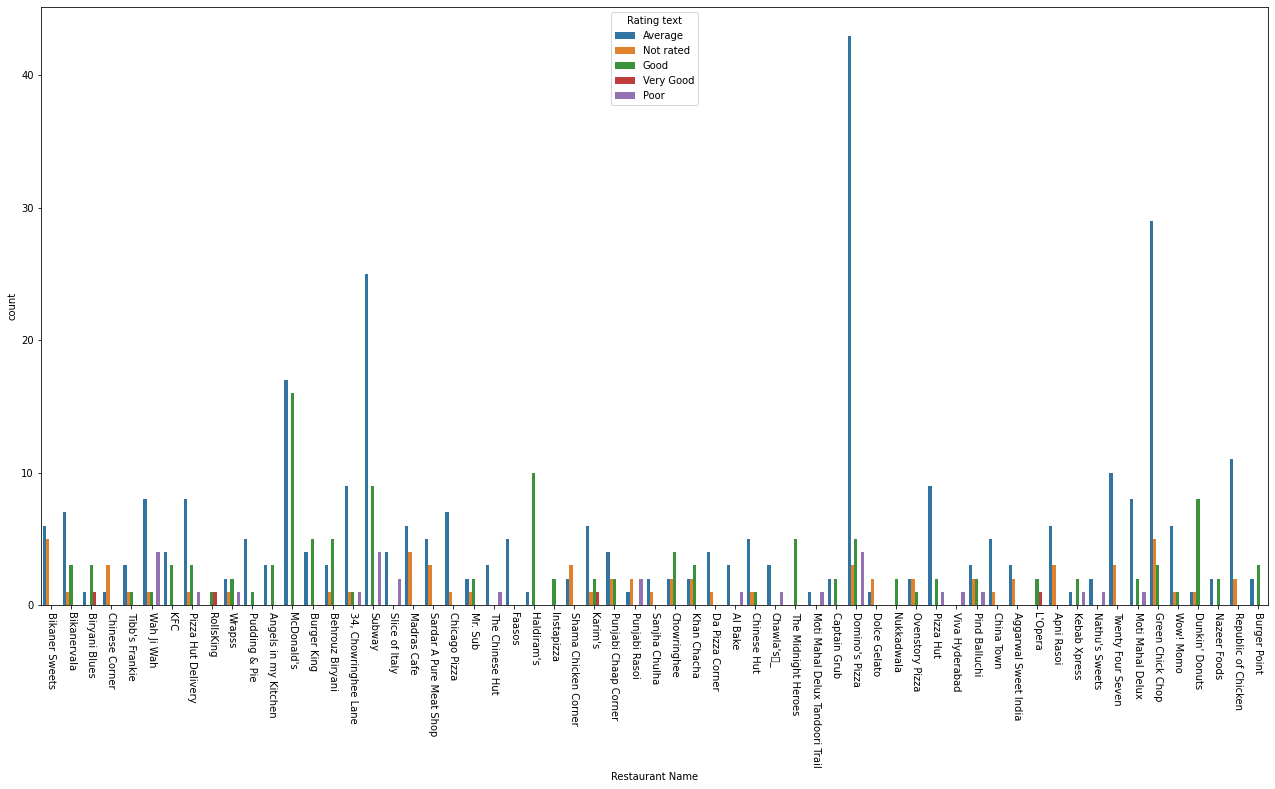

In [ ]:
import seaborn as sns
plt.figure(figsize = (22,11))
sns.countplot(data = competitor_data, x = 'Restaurant Name', hue = 'Rating text')
plt.xticks(rotation = -90)
plt.show()

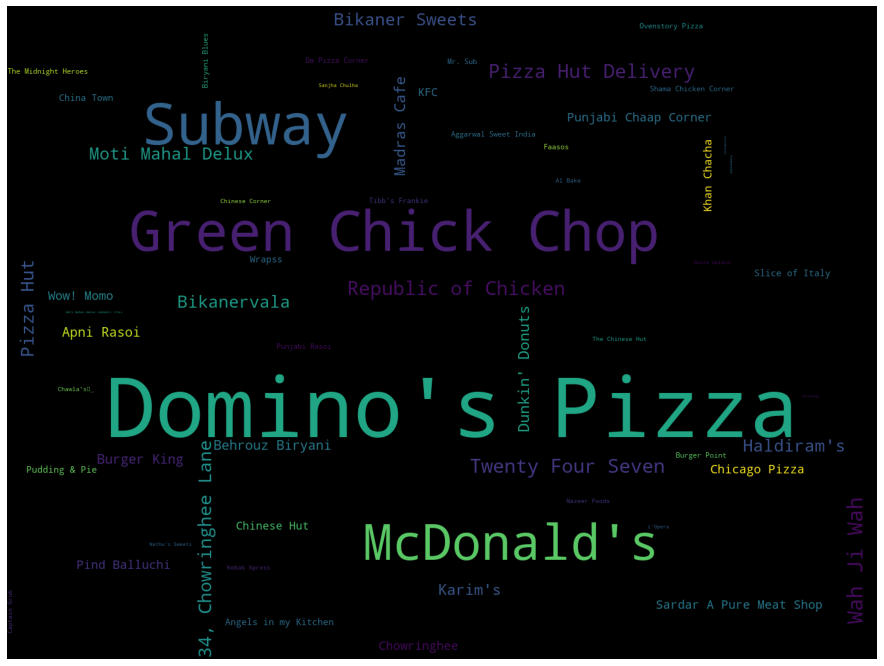

In [ ]:
# Printing the WordCLoud

# Import libraries
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = (WordCloud(width = 1440, height = 1080, relative_scaling = 1, stopwords = stopwords).generate_from_frequencies(competitor_data['Restaurant Name'].value_counts()))

# Creating the figure
fig = plt.figure(1, figsize=(25,12))
plt.imshow(wordcloud) # plot an image
plt.axis("off")
plt.show()